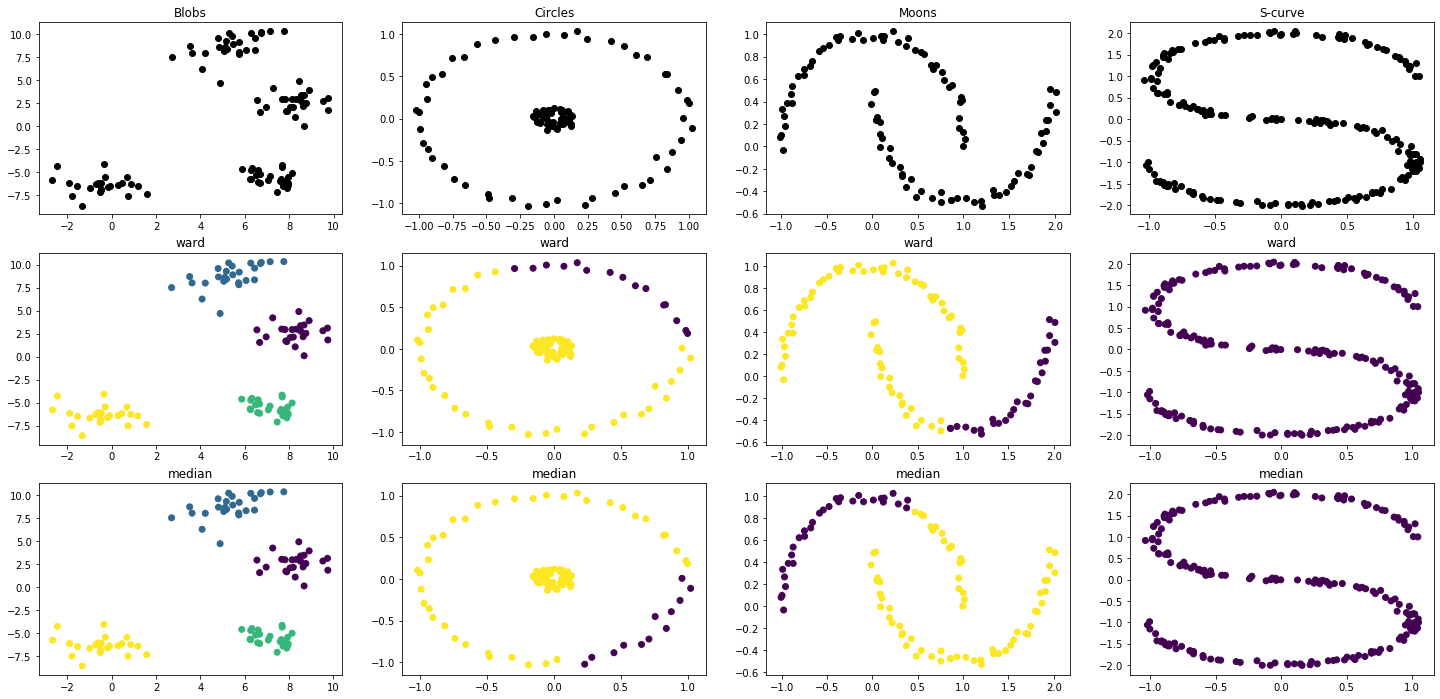

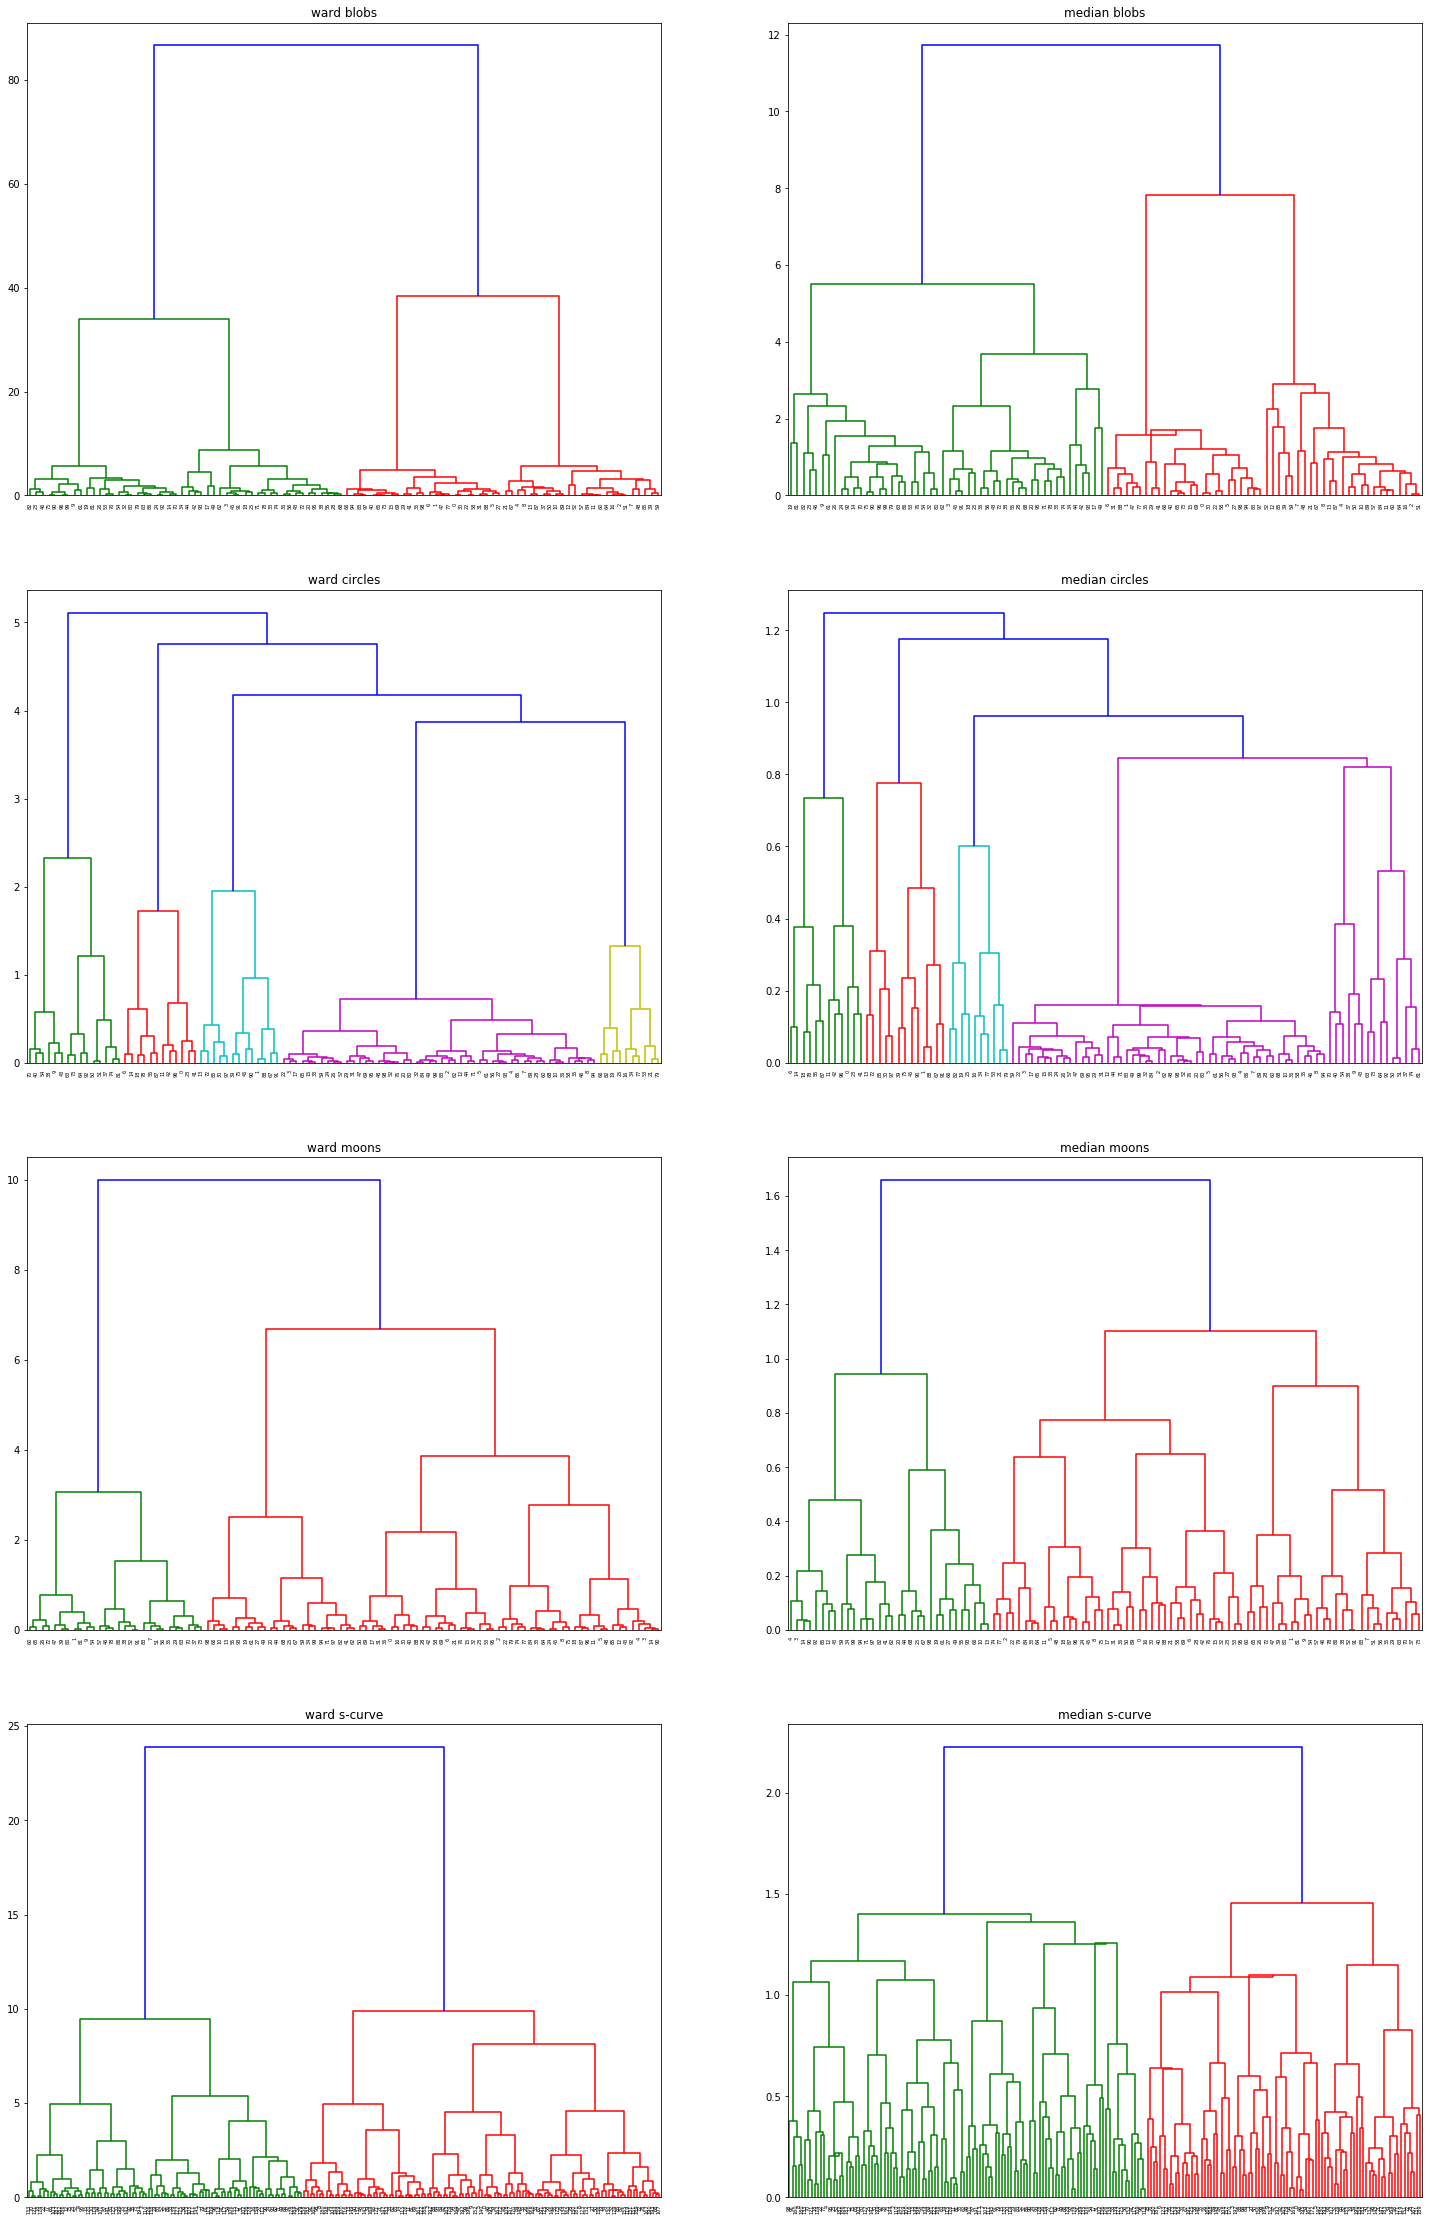

In [14]:
# import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons, make_s_curve, make_swiss_roll

from sklearn.mixture import GaussianMixture


fig, axs1 = plt.subplots(3,4,figsize=(25,12))

fig, axs2 = plt.subplots(4,2,figsize=(25,40))

blobs=make_blobs(100,2,4)
data_blobs=blobs[0]
axs1[0,0].plot(data_blobs[:,0],data_blobs[:,1],'ok');
axs1[0,0].set_title('Blobs');

circles=make_circles(100,noise=0.03, factor=0.1)
data_circles=circles[0]
axs1[0,1].plot(data_circles[:,0],data_circles[:,1],'ok');
axs1[0,1].set_title('Circles');

moons=make_moons(100,noise=0.03)
data_moons=moons[0]
axs1[0,2].plot(data_moons[:,0],data_moons[:,1],'ok');
axs1[0,2].set_title('Moons');

s_curve=make_s_curve(200,noise=0.03)
data_s_curve=s_curve[0]
axs1[0,3].plot(data_s_curve[:,0],data_s_curve[:,2],'ok');
axs1[0,3].set_title('S-curve');

#swiss_roll=make_swiss_roll(200,noise=0.1)
#data_swiss_roll=swiss_roll[0]
#axs1[0,4].plot(data_swiss_roll[:,0],data_swiss_roll[:,2],'ok');
#axs1[0,4].set_title('Swiss-roll');



Z_blobs = linkage(data_blobs, 'ward')
dn = dendrogram(Z_blobs, ax=axs2[0,0])
axs2[0,0].set_title('ward blobs');
clusters= fcluster(Z_blobs, t=4, criterion='maxclust')
axs1[1,0].scatter(data_blobs[:,0], data_blobs[:,1], c=clusters);
axs1[1,0].set_title('ward');

Z_circles = linkage(data_circles, 'ward')
dn = dendrogram(Z_circles, ax=axs2[1,0])
axs2[1,0].set_title('ward circles');
clusters= fcluster(Z_circles, t=2, criterion='maxclust')
axs1[1,1].scatter(data_circles[:,0], data_circles[:,1], c=clusters);
axs1[1,1].set_title('ward');

Z_moons = linkage(data_moons, 'ward')
dn = dendrogram(Z_moons, ax=axs2[2,0])
axs2[2,0].set_title('ward moons');
clusters= fcluster(Z_moons, t=2, criterion='maxclust')
axs1[1,2].scatter(data_moons[:,0], data_moons[:,1], c=clusters);
axs1[1,2].set_title('ward');

Z_s_curve = linkage(data_s_curve, 'ward')
dn = dendrogram(Z_s_curve, ax=axs2[3,0])
axs2[3,0].set_title('ward s-curve');
clusters= fcluster(Z_s_curve, t=1, criterion='maxclust')
axs1[1,3].scatter(data_s_curve[:,0], data_s_curve[:,2], c=clusters);
axs1[1,3].set_title('ward');

#Z_swiss_roll = linkage(data_swiss_roll, 'ward')
#dn = dendrogram(Z_swiss_roll, ax=axs2[4,0])
#axs2[4,0].set_title('ward swiss-roll');
#clusters= fcluster(Z_swiss_roll, t=1, criterion='maxclust')
#axs1[1,4].scatter(data_swiss_roll[:,0], data_swiss_roll[:,2], c=clusters);
#axs1[1,4].set_title('ward');



Z_blobs = linkage(data_blobs, 'median')
dn = dendrogram(Z_blobs, ax=axs2[0,1])
axs2[0,1].set_title('median blobs')
clusters= fcluster(Z_blobs, t=4, criterion='maxclust')
axs1[2,0].scatter(data_blobs[:,0], data_blobs[:,1], c=clusters);
axs1[2,0].set_title('median');

Z_circles = linkage(data_circles, 'median')
dn = dendrogram(Z_circles, ax=axs2[1,1])
axs2[1,1].set_title('median circles')
clusters= fcluster(Z_circles, t=2, criterion='maxclust')
axs1[2,1].scatter(data_circles[:,0], data_circles[:,1], c=clusters);
axs1[2,1].set_title('median');

Z_moons = linkage(data_moons, 'median')
dn = dendrogram(Z_moons, ax=axs2[2,1])
axs2[2,1].set_title('median moons')
clusters= fcluster(Z_moons, t=2, criterion='maxclust')
axs1[2,2].scatter(data_moons[:,0], data_moons[:,1], c=clusters);
axs1[2,2].set_title('median');

Z_s_curve = linkage(data_s_curve, 'median')
dn = dendrogram(Z_s_curve, ax=axs2[3,1])
axs2[3,1].set_title('median s-curve')
clusters= fcluster(Z_s_curve, t=1, criterion='maxclust')
axs1[2,3].scatter(data_s_curve[:,0], data_s_curve[:,2], c=clusters);
axs1[2,3].set_title('median');

#Z_swiss_roll = linkage(data_swiss_roll, 'median')
#dn = dendrogram(Z_swiss_roll, ax=axs2[4,1])
#axs2[4,1].set_title('median swiss-roll')
#clusters= fcluster(Z_swiss_roll, t=1, criterion='maxclust')
#axs1[2,4].scatter(data_swiss_roll[:,0], data_swiss_roll[:,2], c=clusters);
#axs1[2,4].set_title('median');



E:\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: covariance is not positive-semidefinite.


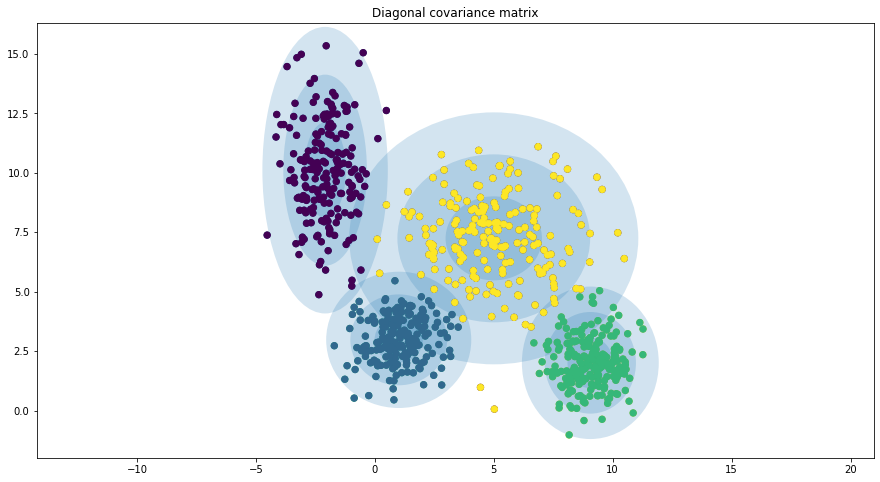

In [17]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

mean1= [1,3]
cov1=[[1, 0], [0, 1]]
data1 = np.random.default_rng().multivariate_normal(mean1, cov1, 200)

mean2= [5,7]
cov2=[[4, 0], [0, 4]]
data2 = np.random.default_rng().multivariate_normal(mean2, cov2, 200)

mean3= [9,2]
cov3=[[0, 1], [1, 0]]
data3 = np.random.default_rng().multivariate_normal(mean3, cov3, 200)

mean4= [-2,10]
cov4=[[1, 0], [0, 4]]
data4 = np.random.default_rng().multivariate_normal(mean4, cov4, 200)

data=np.concatenate((data1,data2,data3,data4))

plt.figure(figsize=(15,8))
gmm = GaussianMixture(n_components=4,covariance_type='diag').fit(data)
labels = gmm.predict(X=data)
plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis');
plt.title('Diagonal covariance matrix')
plot_gmm(gmm, data)

Automatically created module for IPython interactive environment


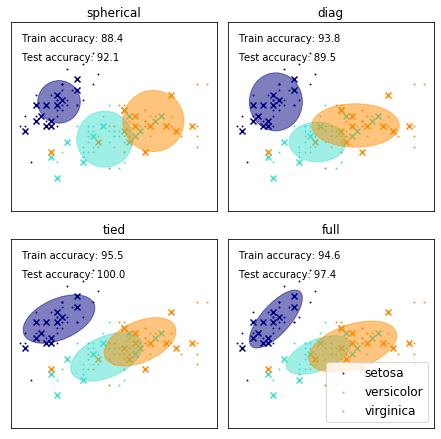

In [3]:
# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)
    
    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))

plt.show()